In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
url = "https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()
print("Initial shape:", df.shape)


Initial shape: (294, 14)


In [14]:
print("=== DATASET BASIC INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

print("First 5 rows of the dataset:")
print(df.head())
print("\n")

print("Dataset information:")
print(df.info())
print("\n")

print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n")

print("Basic statistics:")
print(df.describe())
print("\n")

=== DATASET BASIC INFORMATION ===
Dataset shape: (294, 14)
Number of rows: 294
Number of columns: 14

First 5 rows of the dataset:
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num  
0    ?    0  
1    ?    0  
2    ?    0  
3    6    0  
4    ?    0  


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  

In [19]:
print("=== PREPARING DATA FOR MODELING ===")
df['num'] = df['num'].astype(int)

=== PREPARING DATA FOR MODELING ===


In [22]:
X = df.drop(['num'], axis=1, errors='ignore')
y = df['num']

In [23]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")

Features shape: (294, 13)
Target shape: (294,)



In [24]:
print("Scaling features...")  #scaling the features so they are on a similar range.
X_numeric = X.select_dtypes(include=np.number)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns)


Scaling features...


In [25]:
print("Scaled features summary:")
print(X_scaled.describe().loc[['mean', 'std']], "\n")

Scaled features summary:
               age           sex            cp   oldpeak
mean  3.383537e-16 -9.667248e-17  1.691768e-16  0.000000
std   1.001705e+00  1.001705e+00  1.001705e+00  1.001705 



In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)

In [30]:
print("=== MODEL EVALUATION ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== MODEL EVALUATION ===
Accuracy: 0.746

Confusion Matrix:
 [[30  8]
 [ 7 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.64      0.67      0.65        21

    accuracy                           0.75        59
   macro avg       0.72      0.73      0.73        59
weighted avg       0.75      0.75      0.75        59



In [41]:
for k in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"k={k:2d} → Accuracy={accuracy_score(y_test, pred):.3f}")


k= 1 → Accuracy=0.644
k= 2 → Accuracy=0.678
k= 3 → Accuracy=0.712
k= 4 → Accuracy=0.746
k= 5 → Accuracy=0.746
k= 6 → Accuracy=0.763
k= 7 → Accuracy=0.746
k= 8 → Accuracy=0.814
k= 9 → Accuracy=0.763
k=10 → Accuracy=0.797
k=11 → Accuracy=0.797
k=12 → Accuracy=0.780
k=13 → Accuracy=0.763
k=14 → Accuracy=0.780
k=15 → Accuracy=0.797
k=16 → Accuracy=0.814
k=17 → Accuracy=0.763
k=18 → Accuracy=0.814
k=19 → Accuracy=0.763
k=20 → Accuracy=0.780
k=21 → Accuracy=0.780
k=22 → Accuracy=0.797
k=23 → Accuracy=0.780
k=24 → Accuracy=0.847
k=25 → Accuracy=0.797
k=26 → Accuracy=0.831
k=27 → Accuracy=0.831
k=28 → Accuracy=0.831
k=29 → Accuracy=0.814
k=30 → Accuracy=0.847
k=31 → Accuracy=0.847
k=32 → Accuracy=0.847
k=33 → Accuracy=0.847
k=34 → Accuracy=0.847
k=35 → Accuracy=0.831
k=36 → Accuracy=0.847
k=37 → Accuracy=0.847
k=38 → Accuracy=0.847
k=39 → Accuracy=0.814
k=40 → Accuracy=0.847
k=41 → Accuracy=0.847
k=42 → Accuracy=0.847
k=43 → Accuracy=0.831
k=44 → Accuracy=0.847
k=45 → Accuracy=0.831
k=46 → Acc

In [38]:
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print("=== MODEL EVALUATION ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== MODEL EVALUATION ===
Accuracy: 0.847

Confusion Matrix:
 [[35  3]
 [ 6 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.83      0.71      0.77        21

    accuracy                           0.85        59
   macro avg       0.84      0.82      0.83        59
weighted avg       0.85      0.85      0.84        59



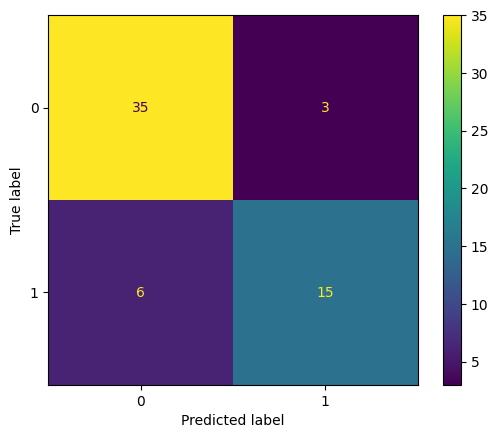

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=knn.classes_)
disp.plot()
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross validation with 5 folds (estimating model performance by spllitting the dataset into 5 parts)
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", round(cv_scores.mean(), 3))

Cross-validation scores: [0.83050847 0.76271186 0.84745763 0.86440678 0.79310345]
Mean cross-validation accuracy: 0.82


In [50]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

#X_train is features, y_train is target
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Combining with feature names
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


   Feature  Importance
2       cp    0.325149
3  oldpeak    0.308179
0      age    0.293156
1      sex    0.073516


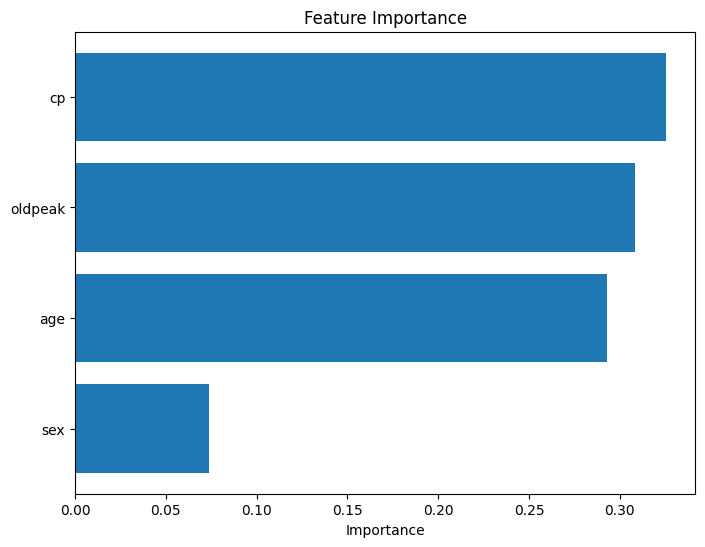

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # largest on top
plt.show()